In [158]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns


In [159]:
df = pd.read_excel('MAXDEFLECTION.xlsx',engine='openpyxl')

In [160]:
df.head()

,L,I,E,W,Deflection Max
0,5,0.0035,180000000000,120000,0.001550
1,6,0.0035,180000000000,120000,0.003214
2,7,0.0035,180000000000,120000,0.005955
3,8,0.0035,180000000000,120000,0.010159
4,9,0.0035,180000000000,120000,0.016272


In [161]:
df.describe()

,L,I,E,W,Deflection Max
count,1008.000000,1008.000000,1.008000e+03,1008.000000,1008.000000
mean,12.500000,0.005827,2.931746e+11,340000.000000,0.112936
std,4.612061,0.001359,6.794648e+10,135573.371378,0.122297
min,5.000000,0.003500,1.800000e+11,120000.000000,0.001372
25%,8.750000,0.004500,2.300000e+11,220000.000000,0.013641
50%,12.500000,0.005700,2.900000e+11,340000.000000,0.060078
75%,16.250000,0.006900,3.500000e+11,460000.000000,0.182015
max,20.000000,0.008100,4.100000e+11,560000.000000,0.443262


In [162]:
df.columns

Index(['L', 'I ', 'E ', 'W ', 'Deflection Max'], dtype='object')

In [163]:
X = df[['L','I ','E ','W ']]
y = df['Deflection Max']

In [164]:
X

,L,I,E,W
0,5,0.0035,180000000000,120000
1,6,0.0035,180000000000,120000
2,7,0.0035,180000000000,120000
3,8,0.0035,180000000000,120000
4,9,0.0035,180000000000,120000
...,...,...,...,...
1003,16,0.0081,410000000000,560000
1004,17,0.0081,410000000000,560000
1005,18,0.0081,410000000000,560000
1006,19,0.0081,410000000000,560000


## Split the data into training and testing sets

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBOOST



In [166]:
regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [167]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 2.609130231315918e-05


In [168]:
new_df = X_test.copy()

In [169]:
new_df['y_test'] = y_test
new_df['y_pred'] = y_pred

In [170]:
new_df.head()

,L,I,E,W,y_test,y_pred
938,15,0.0079,390000000000,540000,0.115533,0.115853
630,11,0.0065,320000000000,400000,0.036661,0.036564
682,15,0.0067,330000000000,420000,0.125217,0.124541
514,7,0.0059,300000000000,360000,0.006359,0.006229
365,18,0.0051,260000000000,280000,0.288631,0.280428


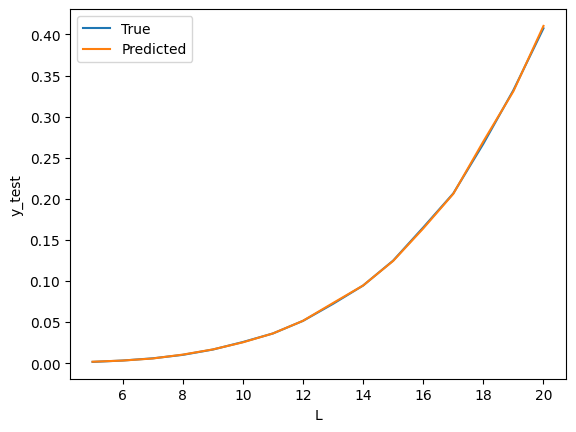

In [171]:
sns.lineplot(x=new_df['L'],y=new_df['y_test'], errorbar=None, label='True')
sns.lineplot(x=new_df['L'],y=new_df['y_pred'], errorbar=None, label='Predicted')
plt.show()

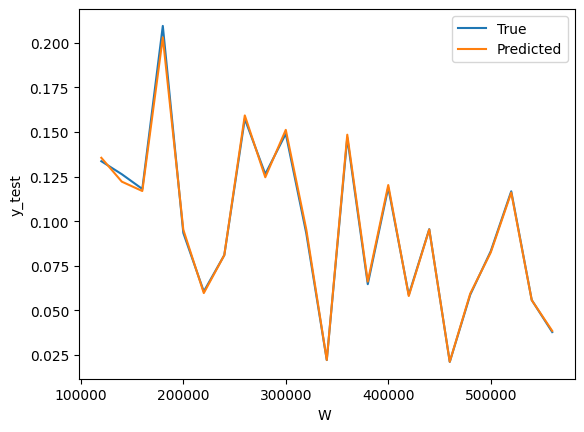

In [172]:

sns.lineplot(x=new_df['W '],y=new_df['y_test'], errorbar=None, label='True')
sns.lineplot(x=new_df['W '],y=new_df['y_pred'], errorbar=None, label='Predicted')
plt.show()

# RANDOM FOREST REGRESSION

In [173]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_RF = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_RF)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 0.007404474445200548


In [174]:
new_dfRF = X_test.copy()
new_dfRF['y_test'] = y_test
new_dfRF['y_pred'] = y_pred_RF

In [175]:
new_dfRF.head()

,L,I,E,W,y_test,y_pred
938,15,0.0079,390000000000,540000,0.115533,0.115891
630,11,0.0065,320000000000,400000,0.036661,0.036887
682,15,0.0067,330000000000,420000,0.125217,0.125581
514,7,0.0059,300000000000,360000,0.006359,0.006143
365,18,0.0051,260000000000,280000,0.288631,0.269722


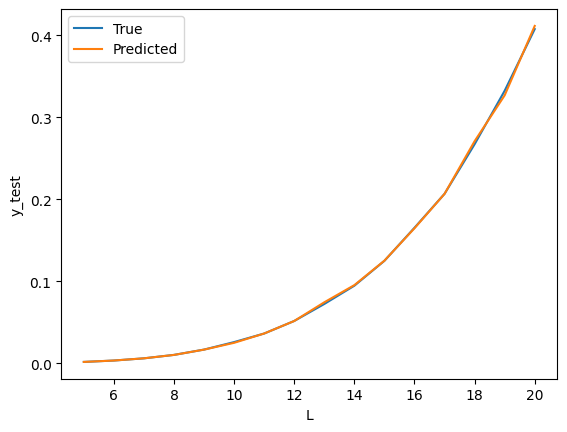

In [176]:
sns.lineplot(x=new_dfRF['L'],y=new_dfRF['y_test'], errorbar=None, label='True')
sns.lineplot(x=new_dfRF['L'],y=new_dfRF['y_pred'], errorbar=None, label='Predicted')
plt.show()

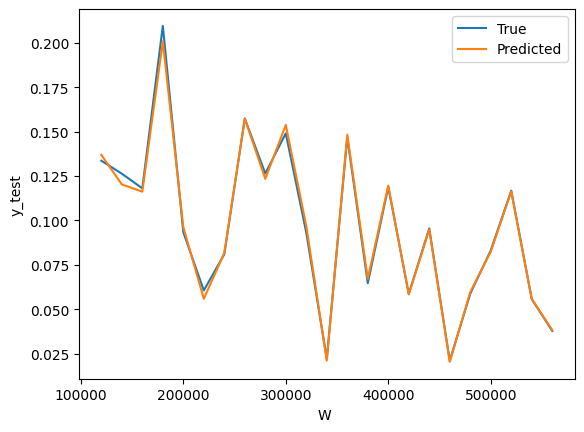

In [177]:
sns.lineplot(x=new_dfRF['W '],y=new_dfRF['y_test'], errorbar=None, label='True')
sns.lineplot(x=new_dfRF['W '],y=new_dfRF['y_pred'], errorbar=None, label='Predicted')
plt.show()

# Ridge Regression

In [178]:
from sklearn.linear_model import Ridge


model = Ridge(alpha=1.0) 
model.fit(X_train, y_train)

# Make predictions
y_pred_RR = model.predict(X_test)

# Evaluate the model
print('Mean squared error:', mean_squared_error(y_test, y_pred_RR))


Mean squared error: 0.00220582228006002


D:\MINORPROJECT\CODE\codeenv\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.66505e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [179]:
new_dfRR = X_test.copy()
new_dfRR['y_test'] = y_test
new_dfRR['y_pred'] = y_pred_RR

In [180]:
new_dfRR.head()

,L,I,E,W,y_test,y_pred
938,15,0.0079,390000000000,540000,0.115533,0.170201
630,11,0.0065,320000000000,400000,0.036661,0.077034
682,15,0.0067,330000000000,420000,0.125217,0.174083
514,7,0.0059,300000000000,360000,0.006359,-0.019367
365,18,0.0051,260000000000,280000,0.288631,0.251883


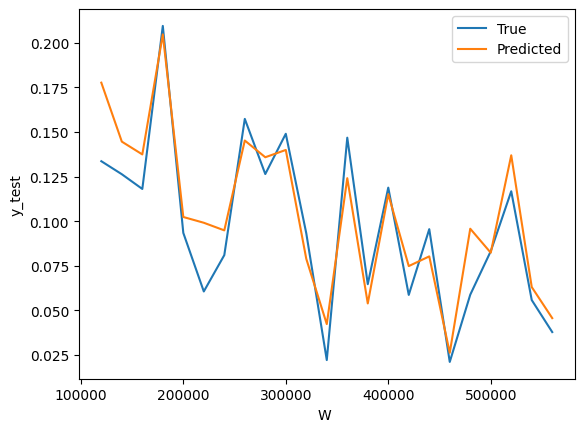

In [181]:
sns.lineplot(x=new_dfRR['W '],y=new_dfRR['y_test'], errorbar=None, label='True')
sns.lineplot(x=new_dfRR['W '],y=new_dfRR['y_pred'], errorbar=None, label='Predicted')
plt.show()

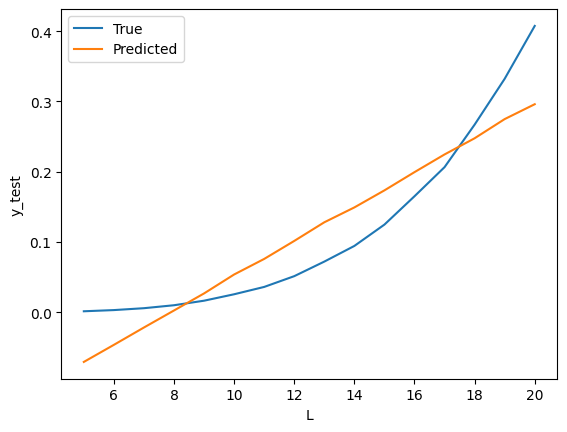

In [182]:
sns.lineplot(x=new_dfRR['L'],y=new_dfRR['y_test'], errorbar=None, label='True')
sns.lineplot(x=new_dfRR['L'],y=new_dfRR['y_pred'], errorbar=None, label='Predicted')
plt.show()